In [1]:
# prompt: import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt                                         # A plotting library for creating static, interactive, and animated visualizations in Python
import matplotlib.ticker as ticker                                      # Provides classes for configuring tick locating and formatting
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt


### Initial loading and Duplication Check of the ABEA and Testing Dataset

In [2]:
# function to read the GRACE-formatted txt file into a df with a 'text' and 'label' column.
def grace_format_to_df_cols(txt_path):

    with open(txt_path, 'r') as file:
        file_content = file.read()

    content_without_docstart = file_content.split('\n', 1)[1]

    # Split the content based on empty lines to get each sequence
    sequences = [seq.strip() for seq in content_without_docstart.split('\n\n') if seq.strip()]

    texts_labels = [process_sequence(seq) for seq in sequences]
    texts, labels = zip(*texts_labels)  # Unzip the texts and labels

    df = pd.DataFrame({
        'text': texts,
        'label': labels
    })

    return df

# function to process each of the sequences
def process_sequence(seq):
    words = []
    labels = []
    char_index = 0  # Start from the first character
    in_label = False
    label_start = 0
    label_sentiment = ''

    for line in seq.split('\n'):
        parts = line.split()
        if len(parts) < 2:  # Skip empty lines or lines without tags
            continue
        word, tag = parts[0], parts[-1]
        words.append(word)

        # If this word starts a new label
        if 'B_AP' in tag:
            if in_label:  # End the previous label if starting a new one
                labels.append([label_start, char_index - 1, label_sentiment])
            in_label = True
            label_start = char_index
            # Determine the sentiment
            if 'HAPPINESS' in tag:
                label_sentiment = 'Happiness'
            elif 'ANGER' in tag:
                label_sentiment = 'Anger'
            elif 'FEAR' in tag:
                label_sentiment = 'Fear'
            elif 'SADNESS' in tag:
                label_sentiment = 'Sadness'
            elif 'NEGATIVE' in tag:
                label_sentiment = 'Negative'
            elif 'NEUTRAL' in tag:
                label_sentiment = 'Neutral'
            elif 'POSITIVE' in tag:
                label_sentiment = 'Positive'
            elif 'NONE' in tag:
                label_sentiment = 'None'


        # If this word is not part of a label or starts a new label
        if 'B_AP' not in tag and 'I_AP' not in tag and in_label:
            labels.append([label_start, char_index - 1, label_sentiment])
            in_label = False

        char_index += len(word) + 1  # Update character index for next word, adding 1 for the space

    # If the last label goes till the end of the sequence
    if in_label:
        labels.append([label_start, char_index - 1, label_sentiment])

    return ' '.join(words), labels

In [3]:
# absa needs to be read properly from the GRACE formatting so that it can be converted to a df
file_path = 'GRACE/data/same_split_as_absa/abea_w_none_clean_trial.txt'
abea_trial = grace_format_to_df_cols(file_path)
file_path = 'GRACE/data/same_split_as_absa/abea_w_none_clean_train.txt'
abea_train = grace_format_to_df_cols(file_path)
file_path = 'GRACE/data/same_split_as_absa/abea_w_none_clean_test.gold.txt'
abea_test = grace_format_to_df_cols(file_path)

concatenated = pd.concat([abea_trial, abea_train, abea_test], ignore_index=True)
abea = concatenated.drop_duplicates(subset=['text'])

print(len(abea))
abea.head(15)

2592


,text,label
0,everybody n they momma parked on the side of c...,"[[0, 9, Sadness], [12, 22, Sadness], [73, 82, ..."
1,"Just posted a photo @ Dylans , George Street ,...","[[14, 19, None]]"
2,Fabulous to be cycling ( virtually ) up the Pa...,"[[15, 22, Happiness], [44, 60, Happiness], [10..."
3,"Memorials , delegations , & flyering today in ...","[[71, 80, Sadness], [85, 93, Sadness], [104, 1..."
4,@realsb4feelings Nothing to do with flu and co...,"[[36, 39, Anger], [44, 58, Anger]]"
5,Ironically beautiful scene at Yosemite with a ...,"[[21, 26, Happiness], [30, 38, Happiness], [46..."
6,@MercedesAMGF1 You guys are just outstanding e...,"[[15, 23, Happiness], [111, 118, Happiness], [..."
7,"@Mobile_Dom Gee , lucky you ! I was so close y...","[[24, 27, Happiness], [76, 82, Sadness]]"
8,Firmino from not scoring to not creating . . . .,"[[0, 7, Sadness]]"
9,@LcfcSpencerr Never met a Leicester fan ever ....,"[[26, 39, None], [91, 95, Anger], [107, 111, A..."


In [4]:
# absa needs to be read properly from the GRACE formatting so that it can be converted to a df
file_path = 'GRACE/data/twitter_1_trial.txt'
mitchell_trial = grace_format_to_df_cols(file_path)
file_path = 'GRACE/data/twitter_1_train.txt'
mitchell_train = grace_format_to_df_cols(file_path)
file_path = 'GRACE/data/twitter_1_test.gold.txt'
mitchell_test = grace_format_to_df_cols(file_path)

mitchell_concatenated = pd.concat([mitchell_trial, mitchell_train, mitchell_test], ignore_index=True)
mitchell_absa = mitchell_concatenated.drop_duplicates(subset=['text'])

print(len(mitchell_absa))
mitchell_absa.head(15)
mitchell_absa.head(15)

2183


,text,label
0,Senior Obama Campaign Staffer Tweets Subtle At...,"[[7, 12, Neutral], [54, 60, Neutral], [63, 107..."
1,"""Mike"" Update : It has been awhile since I spo...","[[0, 6, Neutral], [62, 68, Positive]]"
2,Interior Minister assigned to the Governor San...,"[[0, 17, Neutral], [34, 47, Neutral]]"
3,The world will always have its APPLE . I will ...,"[[31, 36, Positive], [71, 81, Positive]]"
4,Kim Shin Young's Bowel Trouble Maker dae to th...,"[[0, 16, Neutral]]"
5,@ryo_kawashima From now on SG government will ...,"[[27, 40, Negative]]"
6,Dan had a great kickstart today to achieve his...,"[[0, 3, Positive]]"
7,the new Travelmarketplace for events in unity ...,"[[8, 25, Neutral]]"
8,"If we get a brokered convention , I'm supporti...","[[49, 64, Positive]]"
9,ALL I WANT TO COMMENT ON IS TAEYEON'S JAWLINE,"[[28, 37, Neutral]]"


In [5]:
# absa needs to be read properly from the GRACE formatting so that it can be converted to a df
dong_train = 'GRACE/data/dong_train.raw'
dong_test = 'GRACE/data/dong_test.raw'


with open(dong_train, 'r') as file:
    lines1 = file.readlines()

with open(dong_test, 'r') as file:
    lines2 = file.readlines()


dong_absa = lines1 + lines2

print(len(dong_absa) / 3)
dong_absa[:5]


6940.0


["i agree about arafat . i mean , shit , they even gave one to $T$ ha . it should be called '' the worst president '' prize .\n",
 'jimmy carter\n',
 '-1\n',
 'musicmonday $T$ - lucky do you remember this song ? it ` s awesome . i love it .\n',
 'britney spears\n']

### Comparison of ABEA and Testing Datasets

In [6]:
def count_label_occurrences(label_list, label_to_check):
    count = 0
    for sublist in label_list:
        if isinstance(sublist, list):  # Check if the element is a list
            for label in sublist:
                if isinstance(label, str) and label_to_check in label:
                    count += 1
    return count

hap = abea['label'].apply(count_label_occurrences, label_to_check='Happiness').sum()
sad = abea['label'].apply(count_label_occurrences, label_to_check='Sadness').sum()
fea = abea['label'].apply(count_label_occurrences, label_to_check='Fear').sum()
ang = abea['label'].apply(count_label_occurrences, label_to_check='Anger').sum()
non = abea['label'].apply(count_label_occurrences, label_to_check='None').sum()

print(f"Happiness: {hap}")
print(f"Sadness: {sad}")
print(f"Fear: {fea}")
print(f"Anger: {ang}")
print(f"None: {non}")


Happiness: 2135
Sadness: 538
Fear: 282
Anger: 889
None: 1575


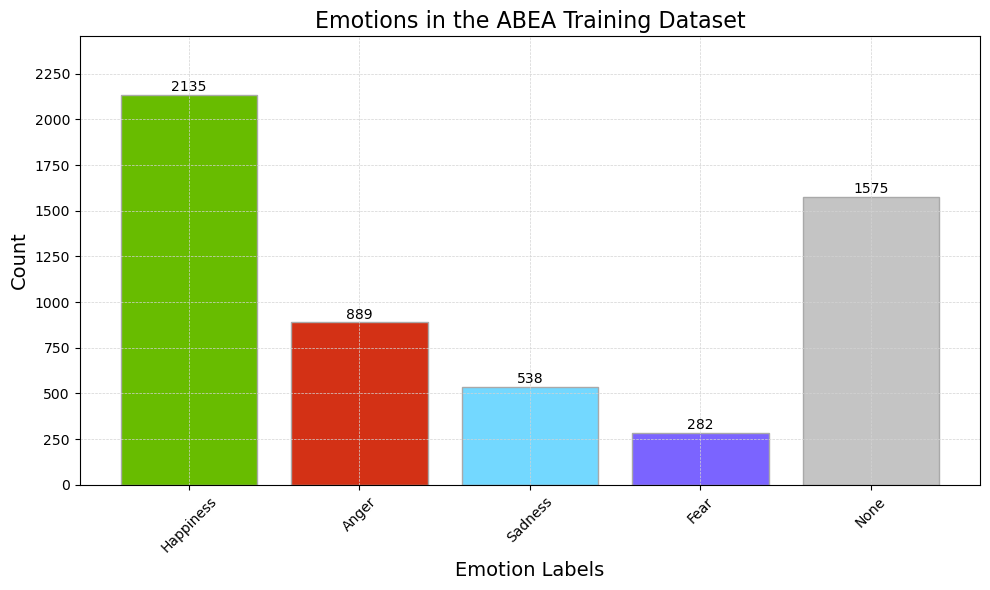

In [7]:
labels = ['Happiness', 'Anger', 'Sadness', 'Fear', 'None']
values = [hap, ang, sad, fea, non]
colors = ['#68bc00', '#d33115', '#73d8ff', '#7b64ff', '#c4c4c4']

#  figure size, face color and edge color
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')
ax.set_facecolor('white')

# bar chart
bars = ax.bar(labels, values, color=colors, edgecolor='darkgrey')

# value labels above bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

# rotate x-axis labels if they overlap
plt.xticks(rotation=45)

# font sizes
ax.set_title('Emotions in the ABEA Training Dataset', fontsize=16)
ax.set_xlabel('Emotion Labels', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# gridlines with light grey color
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey', zorder=0)

# Set axis limits
ax.set_ylim(0, max(values) * 1.15)  # Adding some space above the tallest bar

# set y-axis to show integers only
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Tight layout to fit everything
plt.tight_layout()

plt.show()


In [8]:
def count_label_occurrences(label_list, label_to_check):
    count = 0
    for sublist in label_list:
        if isinstance(sublist, list):  # Check if the element is a list
            for label in sublist:
                if isinstance(label, str) and label_to_check in label:
                    count += 1
    return count

pos = mitchell_absa['label'].apply(count_label_occurrences, label_to_check='Positive').sum()
neg = mitchell_absa['label'].apply(count_label_occurrences, label_to_check='Negative').sum()
neu = mitchell_absa['label'].apply(count_label_occurrences, label_to_check='Neutral').sum()

print(f"Positive: {pos}")
print(f"Negative: {neg}")
print(f"Neutral: {neu}")

Positive: 651
Negative: 250
Neutral: 2084


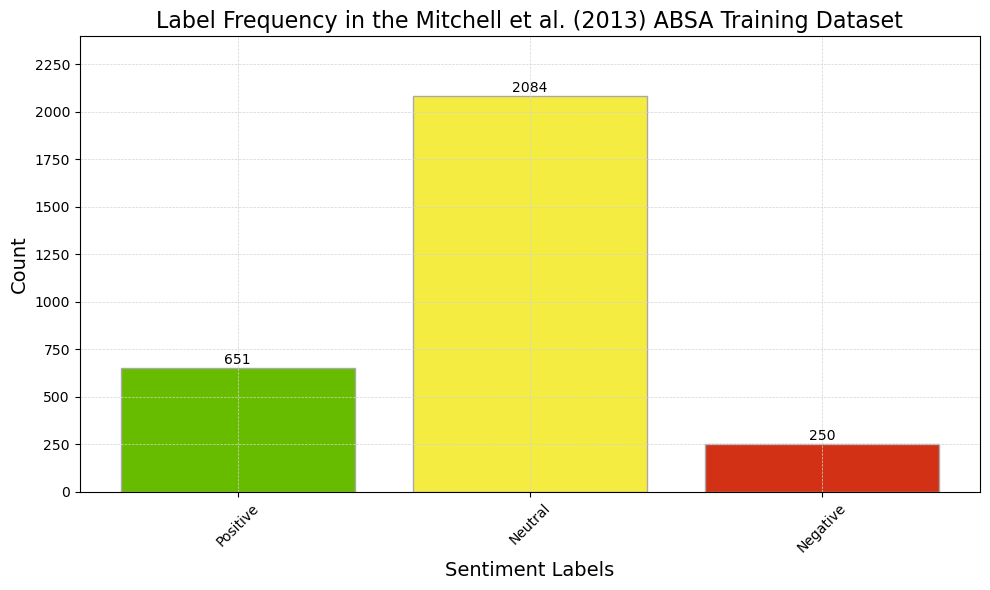

In [9]:
labels = ['Positive', 'Neutral', 'Negative']
values = [pos, neu, neg]
colors = ['#68bc00', '#f5ec42', '#d33115']

#  figure size, face color and edge color
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')
ax.set_facecolor('white')

# bar chart
bars = ax.bar(labels, values, color=colors, edgecolor='darkgrey')

# value labels above bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

# rotate x-axis labels if they overlap
plt.xticks(rotation=45)

# font sizes
ax.set_title('Label Frequency in the Mitchell et al. (2013) ABSA Training Dataset', fontsize=16)
ax.set_xlabel('Sentiment Labels', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# gridlines with light grey color
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey', zorder=0)

# Set axis limits
ax.set_ylim(0, max(values) * 1.15)  # Adding some space above the tallest bar

# set y-axis to show integers only
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Tight layout to fit everything
plt.tight_layout()

plt.show()


In [10]:
counts = Counter()

# Step 3: Iterate over the lines to process every third line
for i in range(2, len(dong_absa), 3):  # Start at 1 and step by 3 to hit the lines with the labels
    # print(line)
    line = dong_absa[i].strip()  # Strip newline characters
    counts[int(line)] += 1    # Convert to integer and update the counter


# cleaned_third_lines = [int(line.strip()) for line in dong_senti_labels]
# counts = Counter(cleaned_third_lines)

# # Step 3: Count the occurrences of 0, 1, and -1
# # Convert the lines to integers and count
# counts = Counter(map(int, dong_senti_labels))

# # Output the counts
print(f"Count of 0: {counts[0]}")
print(f"Count of 1: {counts[1]}")
print(f"Count of -1: {counts[-1]}")

neu = counts[0]
pos = counts[1]
neg = counts[-1]

Count of 0: 3473
Count of 1: 1734
Count of -1: 1733


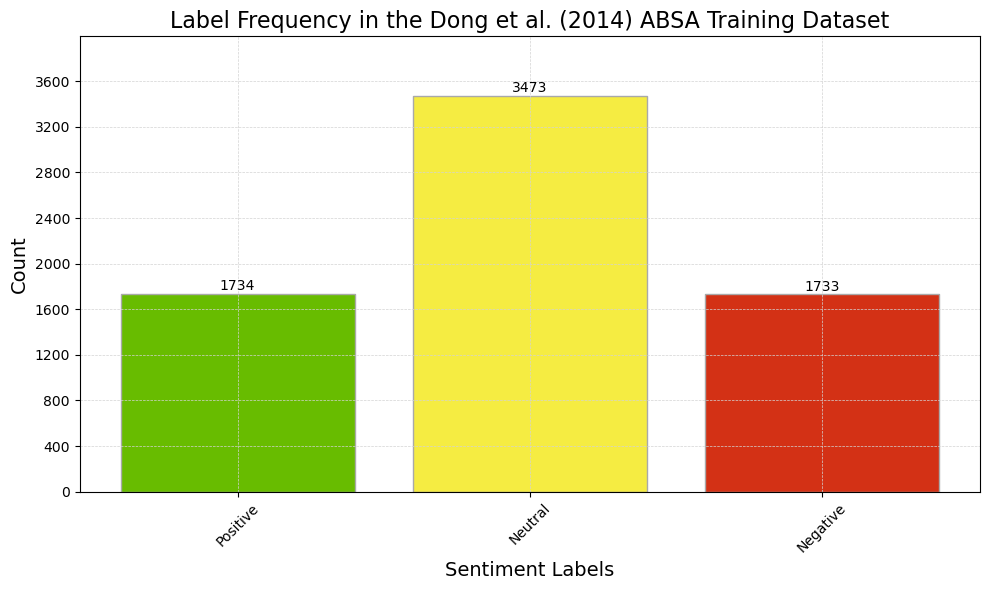

In [11]:
# - polarity label (0: neutral, 1:positive, -1:negative)

labels = ['Positive', 'Neutral', 'Negative']
values = [pos, neu, neg]
colors = ['#68bc00', '#f5ec42', '#d33115']

#  figure size, face color and edge color
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')
ax.set_facecolor('white')

# bar chart
bars = ax.bar(labels, values, color=colors, edgecolor='darkgrey')

# value labels above bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

# rotate x-axis labels if they overlap
plt.xticks(rotation=45)

# font sizes
ax.set_title('Label Frequency in the Dong et al. (2014) ABSA Training Dataset', fontsize=16)
ax.set_xlabel('Sentiment Labels', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# gridlines with light grey color
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey', zorder=0)

# Set axis limits
ax.set_ylim(0, max(values) * 1.15)  # Adding some space above the tallest bar

# set y-axis to show integers only
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Tight layout to fit everything
plt.tight_layout()

plt.show()


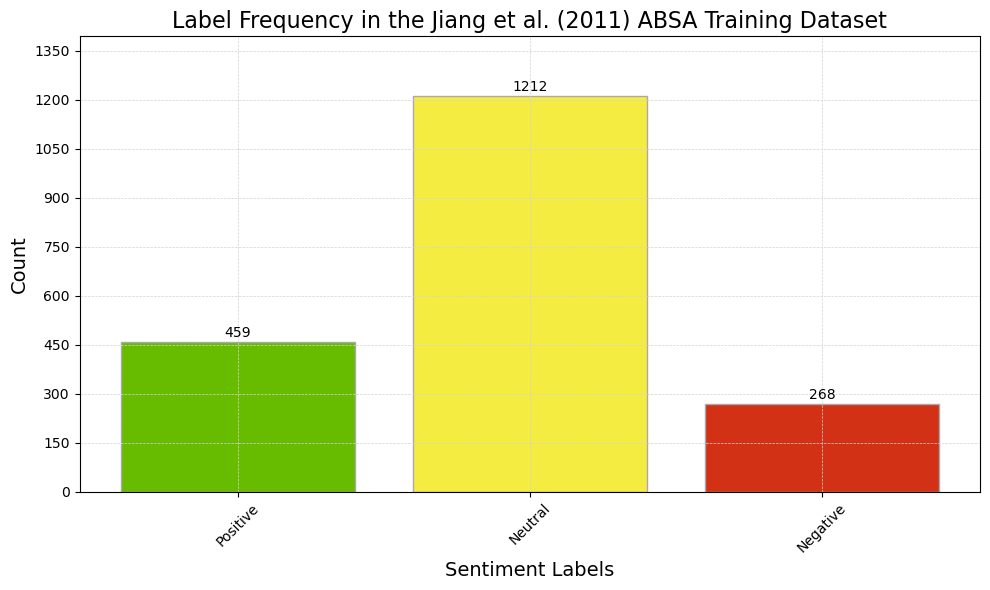

In [12]:
# - polarity label (0: neutral, 1:positive, -1:negative)

labels = ['Positive', 'Neutral', 'Negative']
values = [459, 1212, 268]
colors = ['#68bc00', '#f5ec42', '#d33115']

#  figure size, face color and edge color
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')
ax.set_facecolor('white')

# bar chart
bars = ax.bar(labels, values, color=colors, edgecolor='darkgrey')

# value labels above bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

# rotate x-axis labels if they overlap
plt.xticks(rotation=45)

# font sizes
ax.set_title('Label Frequency in the Jiang et al. (2011) ABSA Training Dataset', fontsize=16)
ax.set_xlabel('Sentiment Labels', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# gridlines with light grey color
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey', zorder=0)

# Set axis limits
ax.set_ylim(0, max(values) * 1.15)  # Adding some space above the tallest bar

# set y-axis to show integers only
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Tight layout to fit everything
plt.tight_layout()

plt.show()


ABEA train file (GRACE/data/same_split_as_absa/abea_w_none_clean_train.txt) stats: Min length: 1, Max length: 70, Average length: 20.40
ABSA train file (GRACE/data/twitter_1_train.txt) stats: Min length: 1, Max length: 35, Average length: 17.26


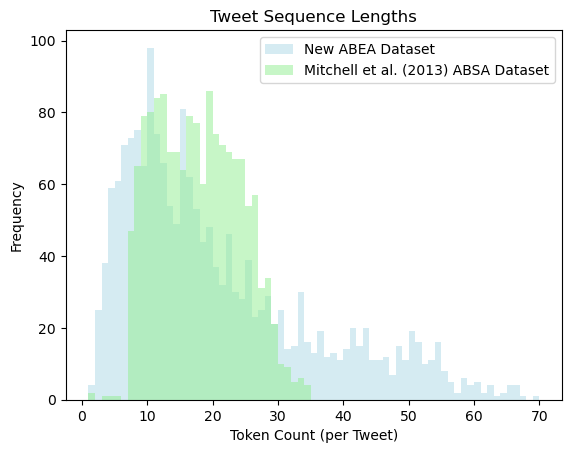

In [13]:
def analyze_sequence_lengths(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        tweet_lengths = []
        current_length = 0
        for line in file:
            if line.strip() == '':  # Empty line indicates end of a tweet
                if current_length > 0:  # Avoid adding if it's consecutive empty lines
                    tweet_lengths.append(current_length)
                    current_length = 0  # Reset for the next tweet
            else:
                current_length += 1  # Increment for each token in a tweet

        # Add the last tweet's length if the file doesn't end with an empty line
        if current_length > 0:
            tweet_lengths.append(current_length)

    # Calculate statistics
    max_length = max(tweet_lengths)
    min_length = min(tweet_lengths)
    avg_length = sum(tweet_lengths) / len(tweet_lengths)
    return tweet_lengths, min_length, max_length, avg_length

# Paths
abea_path = 'GRACE/data/same_split_as_absa/abea_w_none_clean_train.txt'
absa_path = 'GRACE/data/twitter_1_train.txt'  # original dataset

# Analyse sequence lengths for each file
tweet_lengths_1, min_length_1, max_length_1, avg_length_1 = analyze_sequence_lengths(abea_path)
tweet_lengths_2, min_length_2, max_length_2, avg_length_2 = analyze_sequence_lengths(absa_path)

# Print some stats
print(f"ABEA train file ({abea_path}) stats: Min length: {min_length_1}, Max length: {max_length_1}, Average length: {avg_length_1:.2f}")
print(f"ABSA train file ({absa_path}) stats: Min length: {min_length_2}, Max length: {max_length_2}, Average length: {avg_length_2:.2f}")

bin_size = 1

# Define bin size from min to max with with a bin size of 1
bins_1 = np.arange(min_length_1, max_length_1 + bin_size, bin_size)
bins_2 = np.arange(min_length_2, max_length_2 + bin_size, bin_size)

# Plot the two sequence lengths
plt.hist(tweet_lengths_1, bins=bins_1, alpha=0.5, label='New ABEA Dataset', color='lightblue')
plt.hist(tweet_lengths_2, bins=bins_2, alpha=0.5, label='Mitchell et al. (2013) ABSA Dataset', color='lightgreen')
plt.xlabel('Token Count (per Tweet)')
plt.ylabel('Frequency')
plt.title('Tweet Sequence Lengths')
plt.legend()
plt.show()


In [14]:

abea['label'] = abea['label'].astype(str)

print(abea['label'].dtype)

object


C:\Users\chris\AppData\Local\Temp\ipykernel_42708\16508971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abea['label'] = abea['label'].astype(str)


In [15]:
# turn label column into list format for the ABEA dataset

import ast

# # Convert the 'label' column from string to actual list
# nouns['label'] = nouns['label'].apply(ast.literal_eval)

# # check that the label column is now in the correct list format
# print(len(nouns.loc[0, 'label']))

# Function to safely evaluate the string lists
def safe_eval(label_str):
    try:
        # Handle empty lists or strings properly
        if label_str == '[]' or label_str == '':
            return []
        else:
            return ast.literal_eval(label_str)
    except (ValueError, SyntaxError) as e:
        print(f"Error parsing label: {label_str}")
        return None  # or raise an exception or return a default value

# Apply the safe_eval function to convert the 'label' column from string to actual list
abea['label'] = abea['label'].apply(safe_eval)

# Check if there are any parsing errors or None values
parsing_errors = abea[abea['label'].isnull()]
if not parsing_errors.empty:
    print("Rows with parsing errors:")
    print(parsing_errors)
else:
    print("All labels parsed successfully!")

All labels parsed successfully!


C:\Users\chris\AppData\Local\Temp\ipykernel_42708\1597531635.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abea['label'] = abea['label'].apply(safe_eval)


ABEA stats: Min aspect length: 2, Max aspect length: 58, Average aspect length: 10.11
ABSA stats: Min aspect length: 3, Max aspect length: 84, Average aspect length: 11.11


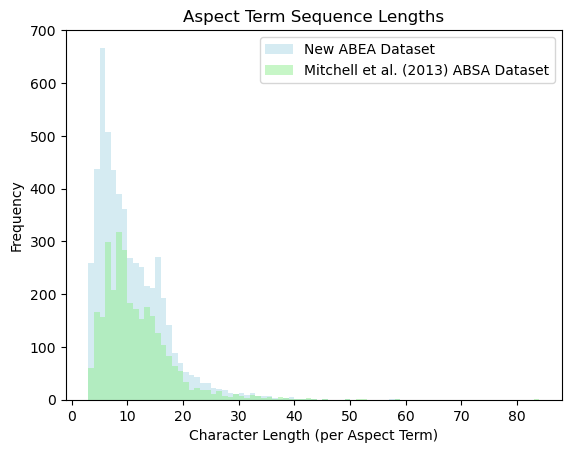

In [16]:
def analyze_aspect_lengths(df):
    aspect_lengths = []
    for _, row in df.iterrows():
        for label in row['label']:
            start, end, _ = label
            # For character length, use end - start + 1
            aspect_length = end - start + 1
            aspect_lengths.append(aspect_length)

    # Calculate statistics
    max_length = max(aspect_lengths)
    min_length = min(aspect_lengths)
    avg_length = sum(aspect_lengths) / len(aspect_lengths)
    return aspect_lengths, min_length, max_length, avg_length


aspect_lengths_abea, min_length_1, max_length_1, avg_length_1 = analyze_aspect_lengths(abea)
aspect_lengths_testing, min_length_2, max_length_2, avg_length_2 = analyze_aspect_lengths(mitchell_absa)

# Print some stats
print(f"ABEA stats: Min aspect length: {min_length_1}, Max aspect length: {max_length_1}, Average aspect length: {avg_length_1:.2f}")
print(f"ABSA stats: Min aspect length: {min_length_2}, Max aspect length: {max_length_2}, Average aspect length: {avg_length_2:.2f}")

bin_size = 1  # Adjust bin size as needed

# Define bin size from min to max with a bin size of 1
# bins_1 = np.arange(min_length_1, max_length_1 + bin_size, bin_size)
bins_2 = np.arange(min_length_2, max_length_2 + bin_size, bin_size)

# Plot the two aspect term lengths
plt.hist(aspect_lengths_abea, bins=bins_2, alpha=0.5, label='New ABEA Dataset', color='lightblue')
plt.hist(aspect_lengths_testing, bins=bins_2, alpha=0.5, label='Mitchell et al. (2013) ABSA Dataset', color='lightgreen')
plt.xlabel('Character Length (per Aspect Term)')
plt.ylabel('Frequency')
plt.title('Aspect Term Sequence Lengths')
plt.legend()
plt.show()

In [17]:
aspect_terms_dong = []
# Step 3: Iterate over the lines to process every third line
for i in range(1, len(dong_absa), 3):  # Start at 1 and step by 3 to hit the lines with the labels
    at = dong_absa[i].strip()  # Strip newline characters
    aspect_terms_dong.append(at)

print(len(aspect_terms_dong))


aspect_terms_dong[:10]


6940


['jimmy carter',
 'britney spears',
 'hilary swank',
 'wii',
 'google',
 'britney spears',
 'hilary swank',
 'wii',
 'harry potter',
 'britney spears']

Piecharts for ABEA and Mitchell et al 2013

In [32]:
# Ensure that you have the required nltk resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def pos_stats(df):
    pos_counts = Counter()

    for _, row in df.iterrows():
        for label in row['label']:
            # Extract the aspect term using character positions
            start, end, _ = label
            aspect_term = row['text'][start:end+1]

            # Tokenize the aspect term
            tokens = word_tokenize(aspect_term)

            # POS tagging
            tagged_tokens = nltk.pos_tag(tokens)

            # Increment count for each POS tag
            for _, tag in tagged_tokens:
                pos_counts[tag] += 1

    return pos_counts


# Mapping of POS tags to more interpretable labels
pos_labels = {
    'NN': 'Noun (Singular)',
    'NNS': 'Noun (Plural)',
    'NNP': 'Proper Noun (Singular)',
    'JJ': 'Adjective',
    'VB': 'Verb (Base)',
    'VBG': 'Verb (Gerund/Present Participle)',
    'CD': 'Cardinal Number',
    'DT': 'Determiner',
    'PRP$': 'Possessive Pronoun',
    'PRP': 'Pronoun',
    'IN': 'Preposition',
    # Add more mappings as needed
}

# Mapping of POS tags to consistent colors
pos_colors = {
    'Noun (Singular)': '#ff9999',
    'Noun (Plural)': '#66b3ff',
    'Proper Noun (Singular)': '#99ff99',
    'Adjective': '#ffcc99',
    'Verb (Base)': '#c2c2f0',
    'Verb (Gerund/Present Participle)': '#ffb3e6',
    'Cardinal Number': '#c4e17f',
    'Determiner': '#76d7c4',
    'Possessive Pronoun': '#f7dc6f',
    'Pronoun': '#e9e9e9',
    'Preposition': '#d2d2d2',
    'Other': '#e6e6e6',  # Default color for "Other"
}

def plot_pos_distribution(pos_counts, title='POS Tag Distribution', top_n=10):
    # Sort counts by most common
    sorted_counts = pos_counts.most_common()

    # Separate the top_n from the rest
    top_counts = sorted_counts[:top_n]
    other_count = sum(count for _, count in sorted_counts[top_n:])

    # Labels and values for the pie chart
    labels, values = zip(*top_counts)
    labels = [pos_labels.get(label, 'Other') for label in labels]  # Replace POS tags with interpretable labels
    labels = list(labels) + ['Other']
    values = list(values) + [other_count]

    # Assign colors based on POS tags
    colors = [pos_colors.get(label, pos_colors['Other']) for label in labels]

    # Create the pie chart with a hole in the middle for the doughnut look
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(values, colors=colors, startangle=40, wedgeprops=dict(width=0.4),
                                       autopct='%1.1f%%', pctdistance=0.85)

    # Move the labels outside the pie chart
    for text in texts:
        text.set_horizontalalignment('center')
        text.set_fontsize(20)

    # Adjust label positions to avoid overlap and reduce distance
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center") # bbox=bbox_props,

    for i, (wedge, label) in enumerate(zip(wedges, labels)):
        ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        y = np.sin(np.radians(ang))
        x = np.cos(np.radians(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        plt.annotate(label, xy=(x, y), xytext=(1.25*np.sign(x), 1.25*y),  # Adjust the factor (1.25) to reduce distance
                     horizontalalignment=horizontalalignment, fontsize=13, **kw)

    plt.setp(autotexts, size=11, color="black")

    # Move the title up and increase its size
    plt.title(title, fontsize=16, pad=40)  # Increase fontsize and adjust pad for spacing
    plt.tight_layout()
    plt.show()
    plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


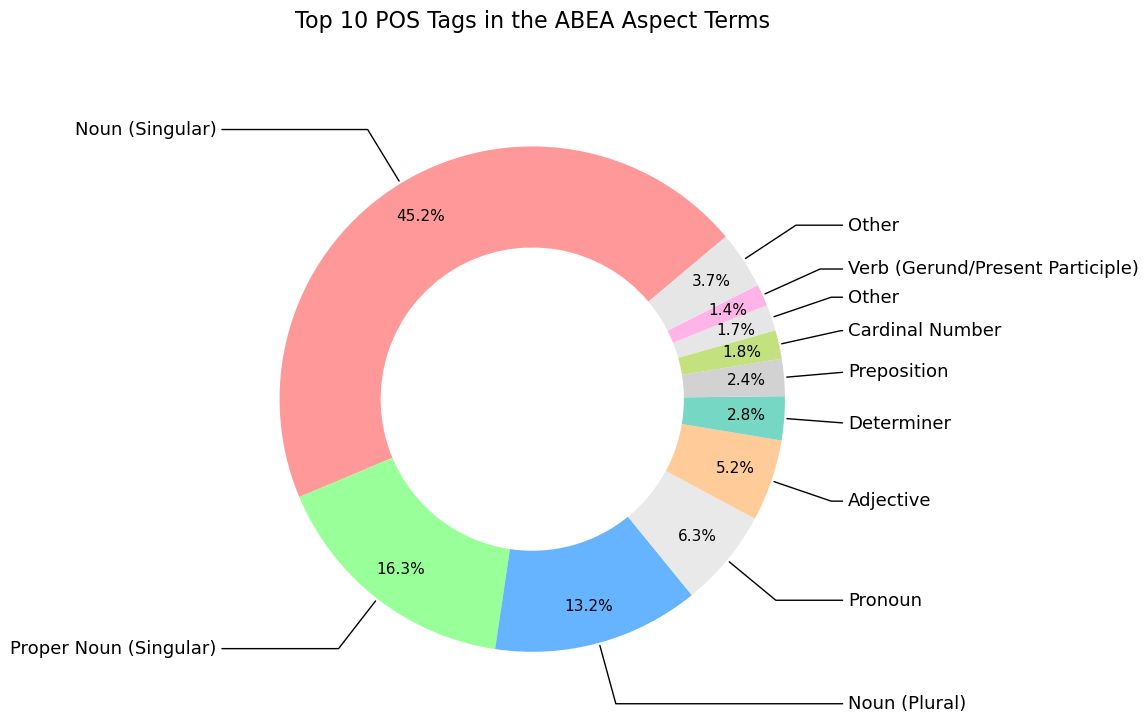

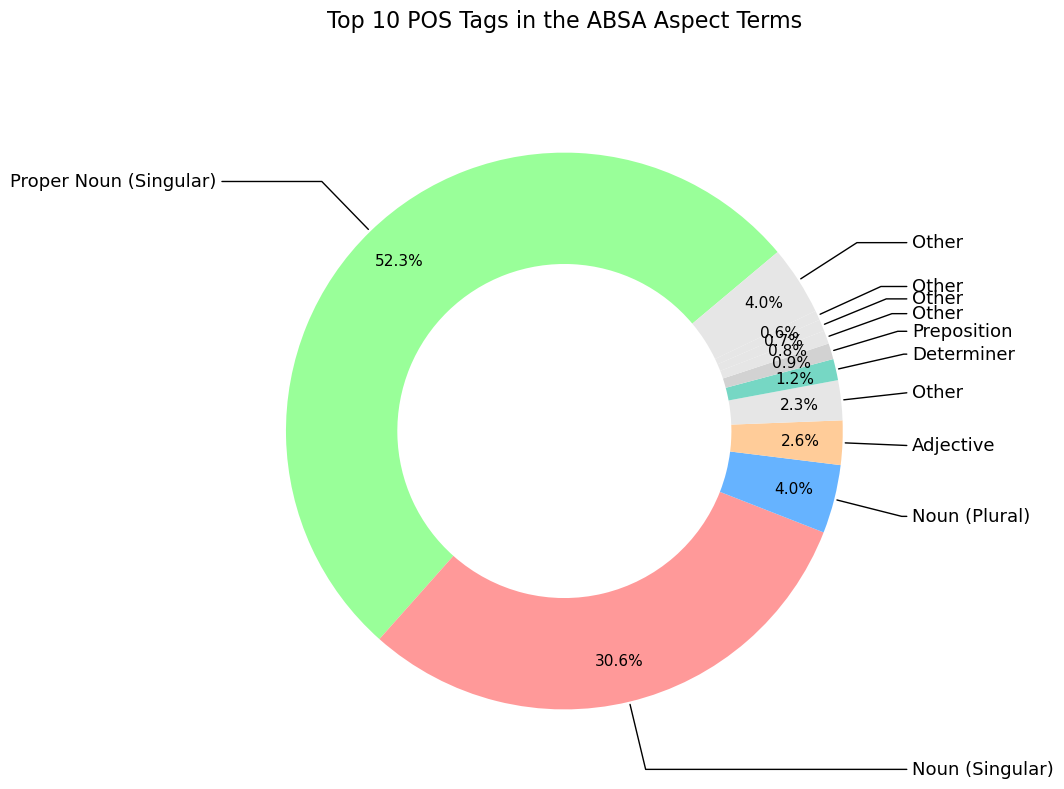

In [33]:
pos_counts_abea = pos_stats(abea)
pos_counts_absa = pos_stats(mitchell_absa)

# for the ABEA dataset
plot_pos_distribution(pos_counts_abea, title='Top 10 POS Tags in the ABEA Aspect Terms')
plot_pos_distribution(pos_counts_absa, title='Top 10 POS Tags in the ABSA Aspect Terms')


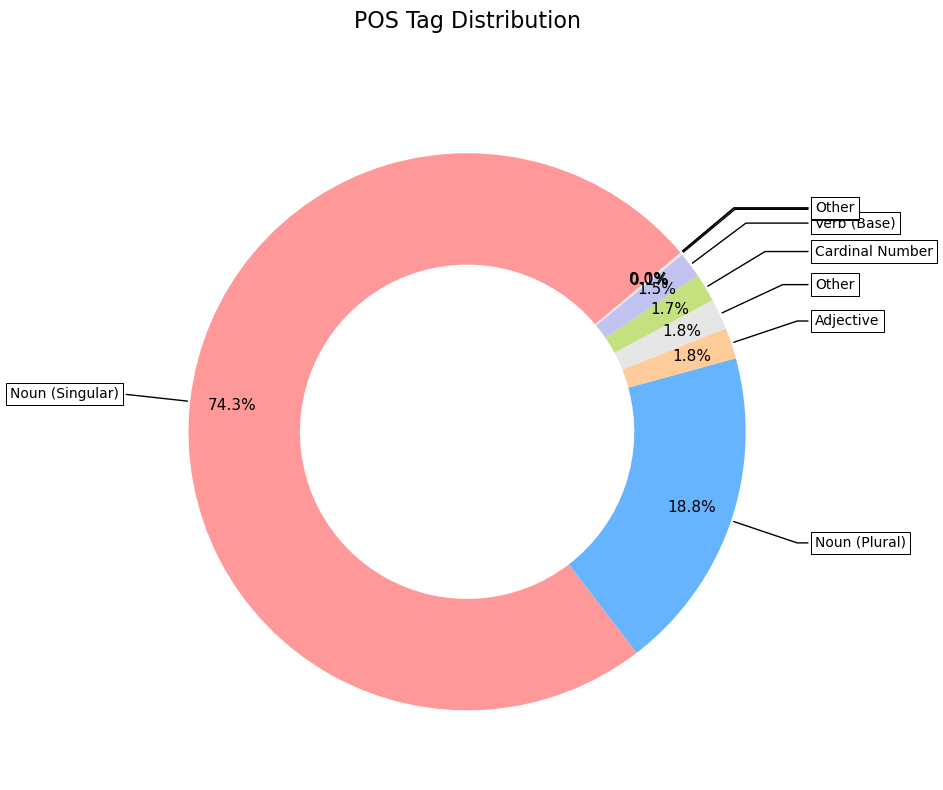

In [55]:

def pos_stats(aspect_terms):
    pos_counts = Counter()

    for aspect_term in aspect_terms:
        # Tokenize the aspect term
        tokens = word_tokenize(aspect_term)

        # POS tagging
        tagged_tokens = nltk.pos_tag(tokens)

        # Increment count for each POS tag
        for _, tag in tagged_tokens:
            pos_counts[tag] += 1

    return pos_counts


# Mapping of POS tags to more interpretable labels
pos_labels = {
    'NN': 'Noun (Singular)',
    'NNS': 'Noun (Plural)',
    'NNP': 'Proper Noun (Singular)',
    'JJ': 'Adjective',
    'VB': 'Verb (Base)',
    'VBG': 'Verb (Gerund/Present Participle)',
    'CD': 'Cardinal Number',
    'DT': 'Determiner',
    'PRP$': 'Possessive Pronoun',
    'PRP': 'Pronoun',
    'IN': 'Preposition',
    # Add more mappings as needed
}

# Mapping of POS tags to consistent colors
pos_colors = {
    'Noun (Singular)': '#ff9999',
    'Noun (Plural)': '#66b3ff',
    'Proper Noun (Singular)': '#99ff99',
    'Adjective': '#ffcc99',
    'Verb (Base)': '#c2c2f0',
    'Verb (Gerund/Present Participle)': '#ffb3e6',
    'Cardinal Number': '#c4e17f',
    'Determiner': '#76d7c4',
    'Possessive Pronoun': '#f7dc6f',
    'Pronoun': '#e9e9e9',
    'Preposition': '#d2d2d2',
    'Other': '#e6e6e6',  # Default color for "Other"
}

def plot_pos_distribution(pos_counts, title='POS Tag Distribution', top_n=10):
    # Sort counts by most common
    sorted_counts = pos_counts.most_common()

    # Separate the top_n from the rest
    top_counts = sorted_counts[:top_n]
    other_count = sum(count for _, count in sorted_counts[top_n:])

    # Labels and values for the pie chart
    labels, values = zip(*top_counts)
    labels = [pos_labels.get(label, 'Other') for label in labels]  # Replace POS tags with interpretable labels
    labels = list(labels) + ['Other']
    values = list(values) + [other_count]

    # Assign colors based on POS tags
    colors = [pos_colors.get(label, pos_colors['Other']) for label in labels]

    # Create the pie chart with a hole in the middle for the doughnut look
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(values, colors=colors, startangle=40, wedgeprops=dict(width=0.4),
                                       autopct='%1.1f%%', pctdistance=0.85)

    # Move the labels outside the pie chart
    for text in texts:
        text.set_horizontalalignment('center')
        text.set_fontsize(10)

    # Adjust label positions to avoid overlap and reduce distance
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

    for i, (wedge, label) in enumerate(zip(wedges, labels)):
        ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        y = np.sin(np.radians(ang))
        x = np.cos(np.radians(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        plt.annotate(label, xy=(x, y), xytext=(1.25*np.sign(x), 1.25*y),  # Adjust the factor (1.25) to reduce distance
                     horizontalalignment=horizontalalignment, **kw)

    plt.setp(autotexts, size=11, color="black")

    # Move the title up and increase its size
    plt.title(title, fontsize=16, pad=40)  # Increase fontsize and adjust pad for spacing
    plt.tight_layout()
    plt.show()

# Example usage with your list of aspect terms

# Get POS counts
pos_counts = pos_stats(aspect_terms_dong)

# Plot POS distribution
plot_pos_distribution(pos_counts)

### Piecharts without labels

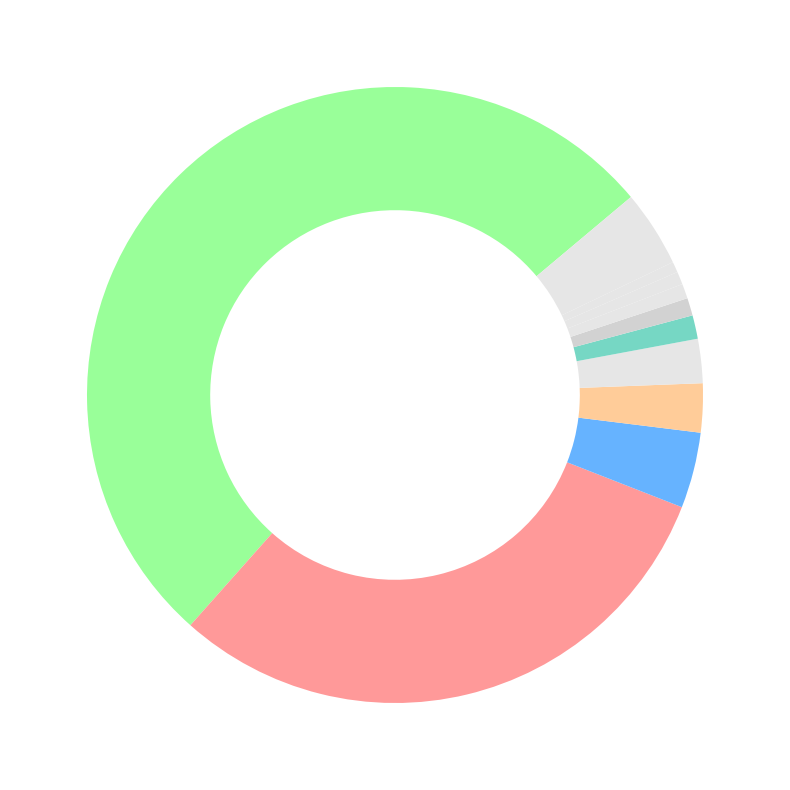

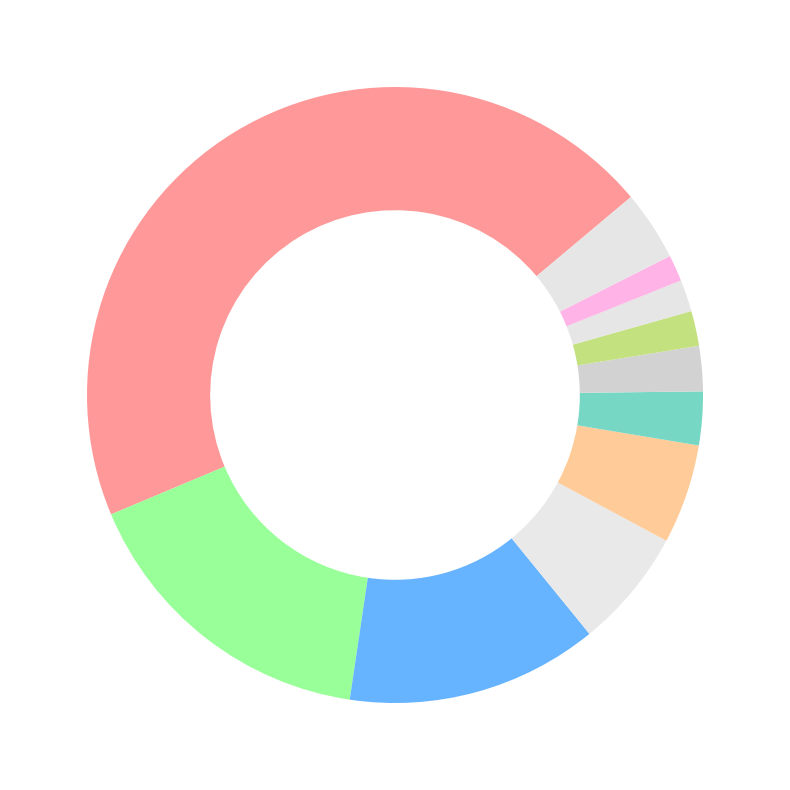

In [34]:

def pos_stats(df):
    pos_counts = Counter()

    for _, row in df.iterrows():
        for label in row['label']:
            # Extract the aspect term using character positions
            start, end, _ = label
            aspect_term = row['text'][start:end+1]

            # Tokenize the aspect term
            tokens = word_tokenize(aspect_term)

            # POS tagging
            tagged_tokens = nltk.pos_tag(tokens)

            # Increment count for each POS tag
            for _, tag in tagged_tokens:
                pos_counts[tag] += 1

    return pos_counts

# Mapping of POS tags to more interpretable labels
pos_labels = {
    'NN': 'Noun (Singular)',
    'NNS': 'Noun (Plural)',
    'NNP': 'Proper Noun (Singular)',
    'JJ': 'Adjective',
    'VB': 'Verb (Base)',
    'VBG': 'Verb (Gerund/Present Participle)',
    'CD': 'Cardinal Number',
    'DT': 'Determiner',
    'PRP$': 'Possessive Pronoun',
    'PRP': 'Pronoun',
    'IN': 'Preposition',
    # Add more mappings as needed
}

# Mapping of POS tags to consistent colors
pos_colors = {
    'Noun (Singular)': '#ff9999',
    'Noun (Plural)': '#66b3ff',
    'Proper Noun (Singular)': '#99ff99',
    'Adjective': '#ffcc99',
    'Verb (Base)': '#c2c2f0',
    'Verb (Gerund/Present Participle)': '#ffb3e6',
    'Cardinal Number': '#c4e17f',
    'Determiner': '#76d7c4',
    'Possessive Pronoun': '#f7dc6f',
    'Pronoun': '#e9e9e9',
    'Preposition': '#d2d2d2',
    'Other': '#e6e6e6',  # Default color for "Other"
}

def plot_pos_distribution(pos_counts, top_n=10):
    # Sort counts by most common
    sorted_counts = pos_counts.most_common()

    # Separate the top_n from the rest
    top_counts = sorted_counts[:top_n]
    other_count = sum(count for _, count in sorted_counts[top_n:])

    # Labels and values for the pie chart
    labels, values = zip(*top_counts)
    labels = [pos_labels.get(label, 'Other') for label in labels]  # Replace POS tags with interpretable labels
    labels = list(labels) + ['Other']
    values = list(values) + [other_count]

    # Assign colors based on POS tags
    colors = [pos_colors.get(label, pos_colors['Other']) for label in labels]

    # Create the pie chart with a hole in the middle for the doughnut look
    plt.figure(figsize=(10, 8))
    wedges, _, autotexts = plt.pie(values, colors=colors, startangle=40, wedgeprops=dict(width=0.4),
                                   autopct=lambda p: f'{p:.1f}%' if p > 60 else '', pctdistance=0.85)

    # Move the labels outside the pie chart
    for text in autotexts:
        text.set_horizontalalignment('center')
        text.set_fontsize(10)

    plt.tight_layout()
    plt.show()

# Example usage
pos_counts = pos_stats(mitchell_absa)
plot_pos_distribution(pos_counts)

pos_counts_abea = pos_stats(abea)
plot_pos_distribution(pos_counts_abea)

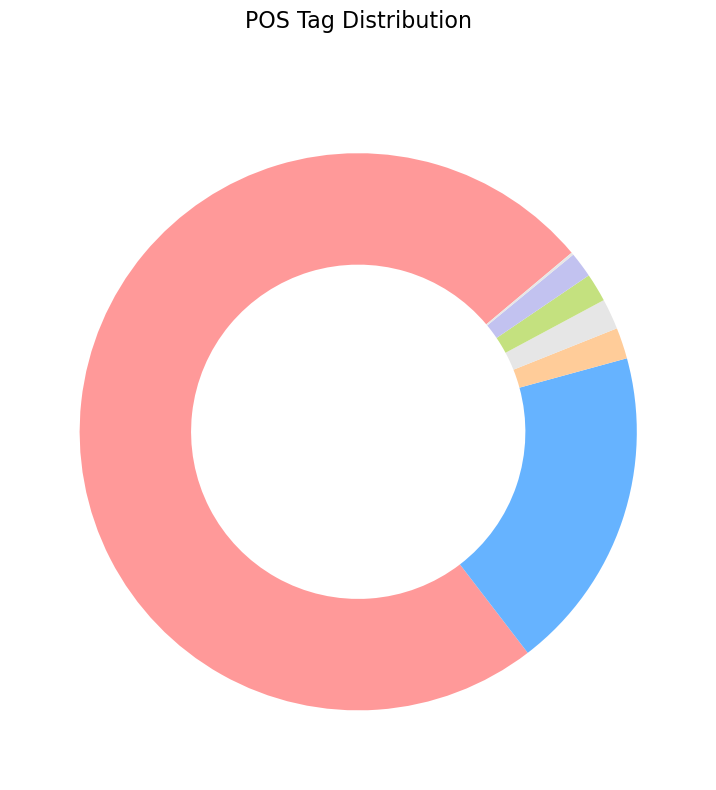

In [68]:

def pos_stats(aspect_terms):
    pos_counts = Counter()

    for aspect_term in aspect_terms:
        # Tokenize the aspect term
        tokens = word_tokenize(aspect_term)

        # POS tagging
        tagged_tokens = nltk.pos_tag(tokens)

        # Increment count for each POS tag
        for _, tag in tagged_tokens:
            pos_counts[tag] += 1

    return pos_counts

# Mapping of POS tags to more interpretable labels
pos_labels = {
    'NN': 'Noun (Singular)',
    'NNS': 'Noun (Plural)',
    'NNP': 'Proper Noun (Singular)',
    'JJ': 'Adjective',
    'VB': 'Verb (Base)',
    'VBG': 'Verb (Gerund/Present Participle)',
    'CD': 'Cardinal Number',
    'DT': 'Determiner',
    'PRP$': 'Possessive Pronoun',
    'PRP': 'Pronoun',
    'IN': 'Preposition',
    # Add more mappings as needed
}

# Mapping of POS tags to consistent colors
pos_colors = {
    'Noun (Singular)': '#ff9999',
    'Noun (Plural)': '#66b3ff',
    'Proper Noun (Singular)': '#99ff99',
    'Adjective': '#ffcc99',
    'Verb (Base)': '#c2c2f0',
    'Verb (Gerund/Present Participle)': '#ffb3e6',
    'Cardinal Number': '#c4e17f',
    'Determiner': '#76d7c4',
    'Possessive Pronoun': '#f7dc6f',
    'Pronoun': '#e9e9e9',
    'Preposition': '#d2d2d2',
    'Other': '#e6e6e6',  # Default color for "Other"
}

def plot_pos_distribution_no_labels(pos_counts, title='POS Tag Distribution', top_n=10):
    # Sort counts by most common
    sorted_counts = pos_counts.most_common()

    # Separate the top_n from the rest
    top_counts = sorted_counts[:top_n]
    other_count = sum(count for _, count in sorted_counts[top_n:])

    # Labels and values for the pie chart
    labels, values = zip(*top_counts)
    labels = [pos_labels.get(label, 'Other') for label in labels]  # Replace POS tags with interpretable labels
    values = list(values) + [other_count]

    # Assign colors based on POS tags
    colors = [pos_colors.get(label, pos_colors['Other']) for label in labels]

    # Create the pie chart with a hole in the middle for the doughnut look
    plt.figure(figsize=(10, 8))
    wedges, _, autotexts = plt.pie(values, colors=colors, startangle=40, wedgeprops=dict(width=0.4),
                                   autopct=lambda p: f'{p:.1f}%' if p > 80 else '', pctdistance=0.85)

    # Move the title up and increase its size
    plt.title(title, fontsize=16, pad=40)
    plt.tight_layout()
    plt.show()

# Get POS counts
pos_counts = pos_stats(aspect_terms_dong)

# Plot POS distribution without labels
plot_pos_distribution_no_labels(pos_counts)